In [9]:
# prompt: `Perform Sentiment Analysis in the network graph using RNN.`
# * use tensorflow
# * use readily available dataset
# * train only on 1k samples as lab may not have GPU \[still do a check if available or fallback to CPU]
# * use notebook style blocks
# * plot accuracy over epochs
# * show samples of actual vs preds

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Check for GPU availability
if tf.config.list_physical_devices('GPU'):
  print("GPU available")
  device_name = '/GPU:0'
else:
  print("GPU not available, using CPU")
  device_name = '/CPU:0'



GPU available


In [10]:

# Set parameters
max_features = 20000
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

# Limit the training data to 1000 samples
x_train = x_train[:1000]
y_train = y_train[:1000]



Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


In [11]:

print('Build model...')
with tf.device(device_name):
  model = Sequential()
  model.add(Embedding(max_features, 128))
  model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

print('Train...')
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,  # Reduced epochs for faster execution
          validation_data=(x_test, y_test))


Build model...
Train...
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.5018 - loss: 0.6927 - val_accuracy: 0.6189 - val_loss: 0.6837
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.7133 - loss: 0.6241 - val_accuracy: 0.6474 - val_loss: 0.6293
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.8638 - loss: 0.4111 - val_accuracy: 0.7324 - val_loss: 0.5921


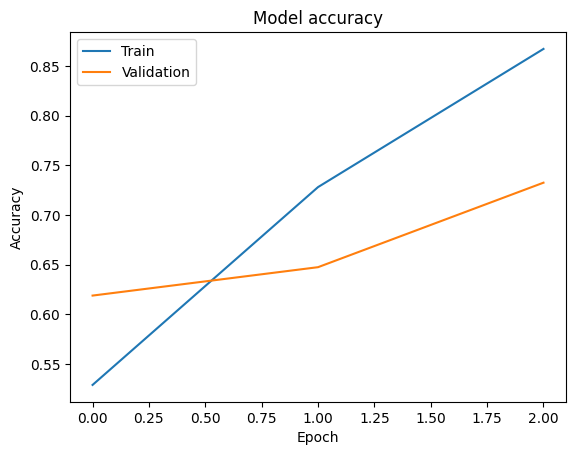

In [12]:

# Plot accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



In [13]:

# Get predictions
y_pred = model.predict(x_test[:10])
y_pred = (y_pred > 0.5).astype("int32")

# Reverse word index to print reviews
word_to_id = imdb.get_word_index()
word_to_id = {k:(v+3) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3

id_to_word = {value:key for key,value in word_to_id.items()}

# Show samples of actual vs predicted
for i in range(5):
  print(f'Review {i+1}:')
  review = ' '.join(id_to_word[id] for id in x_test[i] if id!=0 )
  print("Actual:", y_test[i])
  print("Predicted:", y_pred[i][0])
  print(f"Review Text (truncated for display): {review[:300]}...") #Limit length
  print("-" * 20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step
Review 1:
Actual: 0
Predicted: 0
Review Text (truncated for display): <START> please give this one a miss br br kristy swanson and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was q...
--------------------
Review 2:
Actual: 1
Predicted: 1
Review Text (truncated for display): wonderfully written script br br i praise robert altman this is one of his many films that deals with unconventional fascinating subject matter this film is disturbing but it's sincere and it's sure to elicit a strong emotional response from the viewer if you want to see an unusual film some might e...
--------------------
Review 3:
Actual: 1
Predicted: 1
Review Text (truncated for display): events <UNK> may or may not have had <UNK> turmoil in mind when he made <UNK> but whatever prompted h